<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#ROC-кривая" data-toc-modified-id="ROC-кривая-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>ROC-кривая</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

- Задача: спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Доступны исторические данные о поведении клиентов и расторжении договоров с банком. 

- Необходимо построить модель с предельно большим значением *F1*-меры,  довести метрику до 0.59.

In [72]:
import pandas as pd

import matplotlib.pyplot as plt

#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier

from sklearn.utils import shuffle

from sklearn.metrics import precision_recall_curve, roc_curve

pd.set_option('display.max_columns', 40) #макс кол-во колонок в выводимых данных 
pd.set_option('display.max_rows', 20) #макс кол-во строк в выводимых данных
pd.set_option('display.width', 80) #макс кол-во символов в строке

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

pd.options.mode.chained_assignment = None

import joblib as jb

## Подготовка данных

Загрузим датасет и изучим данные, содержащиеся в нём. 

In [73]:
try: 
    df=pd.read_csv('/datasets/churn.csv')
except: 
    df=pd.read_csv('datasets/churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Посмотрим, нет ли повторов по CustomerId.

In [75]:
df.CustomerId.nunique()

10000

Заполним пропуски в данных о том, сколько лет человек является клиентом банка.

In [76]:
df.Tenure.unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

In [77]:
df.Tenure.fillna(0, inplace=True)

In [78]:
df.Tenure.unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Удалим лишние для анализа колонки о номере строки, CustomerId и фамилии клиента.

In [80]:
del df['RowNumber']
del df['CustomerId']
del df['Surname']

In [81]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Мы видим дисбаланс целевого признака, и в дальнейшем мы это обработаем, но сначала найдем наиболее удачную модель и проверим ее параметры на несбалансированных данных, чтобы позже увидеть, принесла ли обработка дисбаланса данных положительный результат.

In [82]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Проверим, нет ли непохожих на правду данных о возрасте и поле клиентов.

In [83]:
df.Age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

<AxesSubplot:>

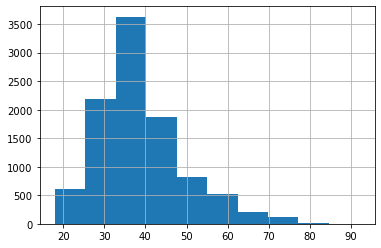

In [84]:
df.Age.hist()

In [85]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [86]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

Проверим, как выглядят данные в других столбцах

In [87]:
df.Tenure.value_counts()

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64

In [88]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:>

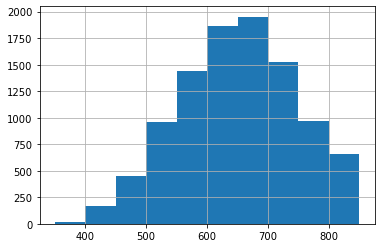

In [89]:
df.CreditScore.hist()

In [90]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:>

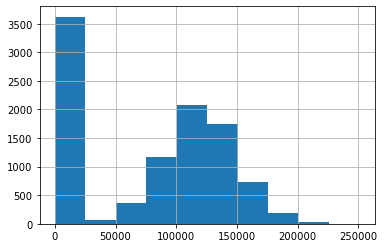

In [91]:
df.Balance.hist()

In [92]:
df.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [93]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

<AxesSubplot:>

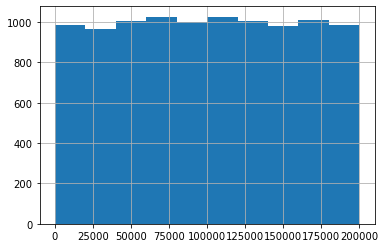

In [94]:
df.EstimatedSalary.hist()

Соотношение пола, данных о том, активен ли клиент примерно 50-50, и распределение кредитного рейтинга нормальное, соотношение групп по заработной плате тоже примерно равное, но есть дисбаланс в других данных: в целевом признаке, в кол-ве открытых продуктов, в наличии кредитной карты, в географии, в количестве лет, которые клиент является клиентом. 

Исследуем мультиколлинеарность факторов.

In [95]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,-0.013319
Balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Существенной взаимосвязи между какими-либо факторами нет, поэтому по этой причине удалять никакие столбцы не будем. 

In [96]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Из всех данных Geography и Gender категориальные, применим к ним OHE.

In [97]:
df_ohe=pd.get_dummies(df)
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [98]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 752.1 KB


Далее разделим выборки на обучающую, валидационную и тестовую, проверим их размеры и выделим из них целевой признак. 

In [99]:
df_other, df_test = train_test_split(df_ohe, test_size=0.2, random_state=123456)
df_train, df_valid=train_test_split(df_other, test_size=0.25, random_state=123456)

In [100]:
df_train.shape

(6000, 14)

In [101]:
df_valid.shape

(2000, 14)

In [102]:
df_test.shape

(2000, 14)

In [103]:
features_train = df_train.drop(['Exited'], axis=1)
target_train = df_train['Exited']

In [104]:
features_valid = df_valid.drop(['Exited'], axis=1)
target_valid = df_valid['Exited']

In [105]:
features_test = df_test.drop(['Exited'], axis=1)
target_test = df_test['Exited']

Масштабируем признаки Credit Score, Age, Balance, Estimated Salary.

In [106]:
to_scale=['Age', 'Balance', 'EstimatedSalary', 'CreditScore']
scaler = StandardScaler()
scaler.fit(features_train[to_scale]) 
features_train[to_scale]=scaler.transform(features_train[to_scale])
features_valid[to_scale]=scaler.transform(features_valid[to_scale])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6903,-0.697227,0.191110,3.0,0.201617,1,1,0,1.374064,0,1,0,1,0
4377,0.708777,-0.188328,9.0,0.407592,1,1,0,-1.278751,1,0,0,1,0
1604,0.698362,-0.757485,1.0,1.227728,1,0,1,-1.428973,1,0,0,1,0
4678,-0.738886,2.088300,8.0,0.799428,1,1,1,-0.086079,0,0,1,0,1
4670,-0.145240,0.191110,2.0,0.993107,2,1,0,0.703915,0,1,0,0,1


Мы разделили данные для обучения, валидации и тестирования, отделили целевой признак, масштабировали численные признаки и приступим к поиску модели. 

## Исследование задачи

Обучим модель RandomForest Classifier без учета дисбаланса признаков. 

In [107]:
#%%time
#best_random_forest_model = None
#best_random_forest_f1 = 0
#best_n_estimators = 0
#best_rf_max_depth = 0

#for est in range(1, 30):
    #for depth in range (1, 30): 
        #random_forest_model = RandomForestClassifier(random_state=123456, n_estimators=est, max_depth=depth, bootstrap=True) 
        #random_forest_model.fit(features_train, target_train) 
        #predicted_valid=random_forest_model.predict(features_valid)
        #rfm_score=f1_score(target_valid, predicted_valid)
        #if rfm_score > best_random_forest_f1:
            #best_random_forest_model = random_forest_model
            #best_random_forest_f1 = rfm_score
            #best_n_estimators = est
            #best_rf_max_depth=depth

#print()
#print("f-1 наилучшей модели на валидационной выборке:", best_random_forest_f1)
#print("accuracy наилучшей модели на валидационной выборке:", best_random_forest_model.score(features_valid, target_valid))
#print("n_estimators наилучшей модели на валидационной выборке:", best_n_estimators)
#print("max_depth наилучшей модели на валидационной выборке:", best_rf_max_depth)

Путем перебора параметров в закомментированной для экономии времени проверки проекта ячейке выше мы получили следующий результат:

- f-1 наилучшей модели на валидационной выборке: 0.560126582278481 <div>
- accuracy наилучшей модели на валидационной выборке: 0.861 <div>
- n_estimators наилучшей модели на валидационной выборке: 15 <div>
- max_depth наилучшей модели на валидационной выборке: 18 <div>

Обучим модель с найденными параметрами и посмотрим на ее результаты:

In [108]:
%%time
random_forest_model = RandomForestClassifier(random_state=123456, n_estimators=15, max_depth=18, bootstrap=True) 
random_forest_model.fit(features_train, target_train)
predicted_valid=random_forest_model.predict(features_valid)
#f1_score(target_valid, predicted_valid)

Wall time: 147 ms


In [109]:
print('Случайный лес на валидационной выборке')
print("Accuracy:", random_forest_model.score(features_valid, target_valid))
print("Recall:", recall_score(target_valid, predicted_valid))
print("Precision:", precision_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))
print()
print('Confusion Matrix:')
print(confusion_matrix(target_valid, predicted_valid))

Случайный лес на валидационной выборке
Accuracy: 0.861
Recall: 0.4481012658227848
Precision: 0.7468354430379747
F1-мера: 0.560126582278481

Confusion Matrix:
[[1545   60]
 [ 218  177]]


Сравним метрики этой модели с моделью, постоянно прогнозирующей случайно: 

In [110]:
dummy_classifier_model = DummyClassifier(strategy='uniform')
dummy_classifier_model.fit(features_train, target_train)
d_c_predictions=dummy_classifier_model.predict(features_valid)

In [111]:
print('DummyClassifier на валидационной выборке')
print("Accuracy:", dummy_classifier_model.score(features_valid, target_valid))
print("Recall:", recall_score(target_valid, d_c_predictions))
print("Precision:", precision_score(target_valid, d_c_predictions))
print("F1-мера:", f1_score(target_valid, d_c_predictions))

DummyClassifier на валидационной выборке
Accuracy: 0.4905
Recall: 0.5265822784810127
Precision: 0.208
F1-мера: 0.2982078853046595


Посмотрим на логистическую регрессию и ее характеристики в данном случае.

In [112]:
logistic_regression_model = LogisticRegression(random_state=123456)
logistic_regression_model.fit(features_train, target_train)
predicted_valid=logistic_regression_model.predict(features_valid)

In [113]:
print('Логистическая регрессия на валидационной выборке')
print("Accuracy:", logistic_regression_model.score(features_valid, target_valid))
print("Recall:", recall_score(target_valid, predicted_valid))
print("Precision:", precision_score(target_valid, predicted_valid))
print("F1-мера:", f1_score(target_valid, predicted_valid))
f1_lr_first=f1_score(target_valid, predicted_valid)
print()
print('Confusion Matrix:')
print(confusion_matrix(target_valid, predicted_valid))

Логистическая регрессия на валидационной выборке
Accuracy: 0.8035
Recall: 0.17468354430379746
Precision: 0.5073529411764706
F1-мера: 0.25988700564971745

Confusion Matrix:
[[1538   67]
 [ 326   69]]


Мы видим, что, хотя F1-мера для случайного леса наибольшая, и в положительную сторону значительно отличается от F-1 меры, полученной на случайно прогнозирующей модели, и от логистической регрессии, она всё еще не достигает целевого значения в 0.59. Поэтому обработаем несбалансированные признаки, масштабируем числовые признаки и посмотрим, как это повлияет на интересующую нас метрику. 

## Борьба с дисбалансом

In [114]:
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1,1,0


#### Взвешивание классов

Для логистической регрессии

In [115]:
new_lr_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
new_lr_model.fit(features_train, target_train)
new_lr_predicted_valid=new_lr_model.predict(features_valid)

In [116]:
print('Логистическая регрессия на валидационной выборке после взвешивания классов')
print("Accuracy:", new_lr_model.score(features_valid, target_valid))
print("Recall:", recall_score(target_valid, new_lr_predicted_valid))
print("Precision:", precision_score(target_valid, new_lr_predicted_valid))
new_lr_f1=f1_score(target_valid, new_lr_predicted_valid)
print("F1-мера:", new_lr_f1)

print()
print('Значение F1-меры до взвешивания классов:', f1_lr_first)

Логистическая регрессия на валидационной выборке после взвешивания классов
Accuracy: 0.7
Recall: 0.6759493670886076
Precision: 0.36129905277401897
F1-мера: 0.47089947089947093

Значение F1-меры до взвешивания классов: 0.25988700564971745


Для модели логистической регрессии после взвешивания классов мы получили существенное увеличение значения F1-меры. 

Для случайного леса

In [117]:
new_random_forest_model = RandomForestClassifier(
    random_state=123456, n_estimators=15, max_depth=18, bootstrap=True, class_weight='balanced') 
new_random_forest_model.fit(features_train, target_train)
new_rf_predicted_valid=new_random_forest_model.predict(features_valid)
f1_score(target_valid, new_rf_predicted_valid)

0.5356576862123613

Взвешивание классов уменьшило значение F1-меры с 0.56

Уменьшение выборки не будем рассматривать, т.к. у нас всего 10000 наблюдений, и те мы разделили на обучающую выборку из 6000, тестовую и валидационную по 2000. Это может ухудшить качество обучения.

#### Увеличение выборки

Разделим обучающую выборку на отрицательные и положительные объекты, умножим появление положительных объектов в новой обучающей выборке, перемешаем данные и обучим модель снова.

Посмотим на соотношение в целевом признаке "ответов" 0 и 1 и увидим, что 0 в 3.88 раз больше, чем 1.

In [118]:
target_zeros=target_train[target_train==0]
target_ones=target_train[target_train==1]

print('0:', target_zeros.shape)
print('1:', target_ones.shape)
dupl_coef=round(target_zeros.shape[0]/target_ones.shape[0])
print('коэффициент для умножения:', dupl_coef)

0: (4773,)
1: (1227,)
коэффициент для умножения: 4


Напишем функцию

In [119]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [120]:
features_upsampled, target_upsampled = upsample(features_train, target_train, int(dupl_coef))

In [121]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(9681, 13)
(9681,)


In [122]:
target_zeros=target_upsampled[target_train==0]
target_ones=target_upsampled[target_train==1]

print('0:', target_zeros.shape)
print('1:', target_ones.shape)

0: (4773,)
1: (4908,)


Соотношение стало гораздо пропорциональнее.

Посмотрим, какие результаты это принесет для логистической регрессии.

In [123]:
upsampled_lr_model=LogisticRegression(random_state=12345, solver='liblinear')
upsampled_lr_model.fit(features_upsampled, target_upsampled)
upsampled_lr_predicted_valid=upsampled_lr_model.predict(features_valid)

In [124]:
print('Логистическая регрессия на валидационной выборке после upsampling')
print("Accuracy:", upsampled_lr_model.score(features_valid, target_valid))
print("Recall:", recall_score(target_valid, upsampled_lr_predicted_valid))
print("Precision:", precision_score(target_valid, upsampled_lr_predicted_valid))
print("F1-мера:", f1_score(target_valid, upsampled_lr_predicted_valid))

print()
print('Значение F1-меры до upsampling:', new_lr_f1)

Логистическая регрессия на валидационной выборке после upsampling
Accuracy: 0.696
Recall: 0.6835443037974683
Precision: 0.35856573705179284
F1-мера: 0.47038327526132406

Значение F1-меры до upsampling: 0.47089947089947093


Проверим случайный лес с найденными ранее параметрами. 

In [125]:
upsampled_random_forest_model = RandomForestClassifier(
    random_state=123456, n_estimators=15, max_depth=18, bootstrap=True) 
upsampled_random_forest_model.fit(features_upsampled, target_upsampled)
upsampled_rf_predicted_valid=upsampled_random_forest_model.predict(features_valid)
f1_score(target_valid, upsampled_rf_predicted_valid)

0.5643153526970954

F1-меру это не улучшило, поэтому проверим, найдутся ли новые лучшие параметры для случайного леса на upsampled обучающих данных. 

In [126]:
#%%time
#best_random_forest_model = None
#best_random_forest_f1 = 0
#best_n_estimators = 0
#best_rf_max_depth = 0

#for est in range(1, 30):
    #for depth in range (1, 30): 
        #random_forest_model = RandomForestClassifier(random_state=123456, n_estimators=est, max_depth=depth, bootstrap=True) 
        #random_forest_model.fit(features_upsampled, target_upsampled)
        #predicted_valid=random_forest_model.predict(features_valid)
        #rfm_score=f1_score(target_valid, predicted_valid)
        #if rfm_score > best_random_forest_f1:
            #best_random_forest_model = random_forest_model
            #best_random_forest_f1 = rfm_score
            #best_n_estimators = est
            #best_rf_max_depth=depth

#print()
#print("f-1 наилучшей модели на валидационной выборке:", best_random_forest_f1)
#print("accuracy наилучшей модели на валидационной выборке:", best_random_forest_model.score(features_valid, target_valid))
#print("n_estimators наилучшей модели на валидационной выборке:", best_n_estimators)
#print("max_depth наилучшей модели на валидационной выборке:", best_rf_max_depth)

- f-1 наилучшей модели на валидационной выборке: 0.5935162094763092 <div>
- accuracy наилучшей модели на валидационной выборке: 0.837<div>
- n_estimators наилучшей модели на валидационной выборке: 14<div>
- max_depth наилучшей модели на валидационной выборке: 11<div>
_Wall time: 2min 47s_

На измененных обучающих данных мы получили новые параметры для модели и применим их. Здесь мы достигли целевого значения F1-меры. 

In [127]:
rf_model = RandomForestClassifier(
    random_state=123456, n_estimators=14, max_depth=11, bootstrap=True) 
rf_model.fit(features_upsampled, target_upsampled)
rf_predicted_valid=rf_model.predict(features_valid)
f1_score(target_valid, rf_predicted_valid)

0.5935162094763092

In [128]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8369,684,37,1.0,126817.13,2,1,1,29995.83,0,1,0,0,1
5395,589,48,5.0,126111.61,1,0,1,133961.19,0,1,0,0,1
7996,717,22,5.0,112465.06,1,1,1,92977.75,1,0,0,1,0
4157,850,62,5.0,0.00,2,1,1,180243.56,0,0,1,0,1
3324,808,47,8.0,139196.00,1,0,1,74028.36,0,0,1,0,1


Взглянем на F1-меру на тестовой выборке.

In [129]:
to_scale=['Age', 'Balance', 'EstimatedSalary', 'CreditScore']
scaler = StandardScaler()
scaler.fit(features_test[to_scale]) 
features_test[to_scale]=scaler.transform(features_test[to_scale])

rf_predicted_test=rf_model.predict(features_test)
f1_score(target_test, rf_predicted_test)

0.6054181389870437

Сохраним получившуюся модель. Далее мы оценим ее адекватность, протестируем на тестовых данных и оценим ее по другим метрикам, которые указаны в задании. 

In [130]:
jb.dump(rf_model, '2part_2project_bank_rf_model.joblib')

['2part_2project_bank_rf_model.joblib']

## Тестирование модели

Обучим полученную модель на всём объеме данных (train+valid) и протестируем на test.

In [131]:
df_other.shape

(8000, 14)

In [132]:
features_other = df_other.drop(['Exited'], axis=1)
target_other = df_other['Exited']

In [133]:
to_scale=['Age', 'Balance', 'EstimatedSalary', 'CreditScore']
scaler = StandardScaler()
scaler.fit(features_other[to_scale]) 
features_other[to_scale]=scaler.transform(features_other[to_scale])
features_other.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2073,-0.245540,0.858444,2.0,-1.216105,2,1,1,-0.068215,0,0,1,1,0
3916,-1.145751,-0.281777,0.0,-1.216105,3,1,1,0.333802,0,0,1,0,1
62,-0.980195,-0.566833,1.0,-0.319829,2,0,0,1.372285,0,0,1,0,1
1376,-1.994225,0.193315,0.0,-0.038321,3,1,1,1.492933,1,0,0,0,1
2070,0.716754,0.288333,4.0,-1.216105,1,1,0,-1.236695,1,0,0,1,0


In [134]:
features_other_upsampled, target_other_upsampled = upsample(features_other, target_other, int(dupl_coef))

In [135]:
features_other_upsampled.shape

(12866, 13)

In [136]:
target_zeros=target_other_upsampled[target_other_upsampled==0]
target_ones=target_other_upsampled[target_other_upsampled==1]
print('0:', target_zeros.shape)
print('1:', target_ones.shape)

0: (6378,)
1: (6488,)


In [137]:
rf2_model = RandomForestClassifier(
    random_state=123456, n_estimators=14, max_depth=11, bootstrap=True) 
rf2_model.fit(features_other_upsampled, target_other_upsampled)

RandomForestClassifier(max_depth=11, n_estimators=14, random_state=123456)

In [138]:
rf2_predicted_valid=rf2_model.predict(features_test)
f1_score(target_test, rf2_predicted_valid)

0.6055248618784531

Вывод: мы достигли целевого значения F1-меры для полученной модели. Она лишь очень незначительно выше этой метрики на модели, обученной только на выборке train, без добавления еще выборки valid для обучения. 

Сравним с моделью, прогнозирующей случайно, на тестовой выборке.

In [139]:
dummy_classifier_model = DummyClassifier(strategy='uniform')
dummy_classifier_model.fit(features_other_upsampled, target_other_upsampled)
d_c_predictions=dummy_classifier_model.predict(features_test)

print('DummyClassifier на test выборке')
print("Accuracy:", dummy_classifier_model.score(features_test, target_test))
print("Recall:", recall_score(target_test, d_c_predictions))
print("Precision:", precision_score(target_valid, d_c_predictions))
print("F1-мера:", f1_score(target_valid, d_c_predictions))

DummyClassifier на test выборке
Accuracy: 0.487
Recall: 0.5012048192771085
Precision: 0.1746341463414634
F1-мера: 0.252112676056338


Видим, что F1-мера, полученная для нашей модели, значительно больше F1-меры для DummyClassifier.

PR-кривая

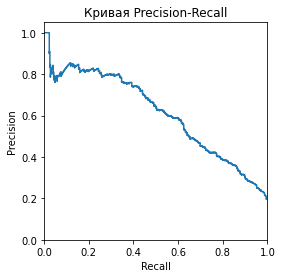

In [140]:
probabilities_valid = rf_model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(4, 4))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

На графике по вертикали нанесено значение точности, по горизонтали — полноты, и чем выше кривая, тем лучше модель.

#### ROC-кривая

Поскольку для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый и чем график выше, тем больше значение TPR и лучше качество модели, то для того, чтобы выявить, как сильно наша модель отличается от случайной, мы посчитаем площадь под ROC-кривой — AUC-ROC (для случайной модели она равна 0.5)

In [141]:
probabilities_test = rf2_model.predict_proba(features_test)
probabilities_one_valid = probabilities_test[:, 1]
auc_roc=roc_auc_score(target_test, probabilities_one_valid)
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8498354300482689


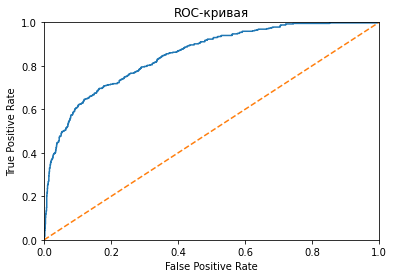

In [142]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Идеальной модели соответствовала бы ROC-кривая, проходящая через точку (0, 1), площадь под ней равна 1. Мы видим, что кривая нашей модели стремится к ней в большей степени, чем к кривой случайной модели. 

AUC ROC (площадь под кривой) в нашем случае - задаче классификации - равна доле пар объектов вида (объект класса 1, объект класса 0), которые найденная модель определила (упорядочила) верно. 

## Выводы

После соответствующей подготовки полученных данных, мы построили на их основе модель, предсказывающую, перестанет ли клиент быть клиентом банка в ближайшее время или нет. Мы достигли заданного значения F1-меры, тестировали модель, а также исследовали метрику AUC ROC. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*